<center><div > <h1 style="color:blue;">CNN based Image Classifier using Keras   </h1></div>
<hl></center> 

**Anoop K. & Manjary P. Gangan** <br>
CIDA Labs, Department of Computer Science<br>
University of Calicut<br>
https://dcs.uoc.ac.in/~anoop <br>
https://dcs.uoc.ac.in/~manjary <br><br>
________________


<center> <img width="600" height="300" src="https://drive.google.com/uc?id=17WQKGWuNAHgHLIxklGCeKwH7F6cwJNNs"> </<center>






# Cat vs. Dog Image Classification
This tutorial presents a simple image classifier using keras from just a few hundred or thousand pictures from each class you want to be able to recognize.<br><br>
Dataset Details: <br>
The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat). <br>
Data can be downloaded at: https://www.kaggle.com/c/dogs-vs-cats/data  <br>
All you need is the train set and the recommended folder structure is: <br>
_________________________

```python
data/
    train/
        dogs/ ### 100 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 100 pictures
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/ ### 50 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 50 pictures
            cat001.jpg
            cat002.jpg
            ...
```
Note : for this example we only consider 2x100 training images and 2x50 testing images among the 2x12500 available. <br>
<div style="text-align: justify"> The github repo includes about 1500 images for this model. The original Kaggle dataset is much larger. The purpose of this demo is to show how you can build models with smaller size datasets. You should be able to improve this model by using more data. </div>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



#Data Loading...  

In [27]:
from __future__ import print_function, division
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from skimage import io

In [3]:
# dimensions of our images
img_width, img_height = 150, 150
batch_size = 32

train_data_dir = '/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/CvD/train'
validation_data_dir = '/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/CvD/validation'

In [4]:
##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
def imshow(img):
  io.imshow(img)
  io.show()

(150, 150, 3)


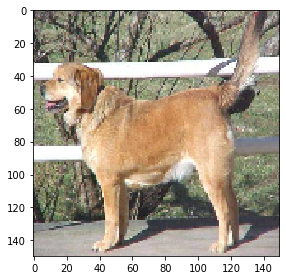

In [25]:
x, y = validation_generator.next()
img = x[0]
print(img.shape)
imshow(img)

# Simple CNN Architecture Definition

Convolution2D :Convolution operator for filtering windows of two-dimensional inputs.
<br>
1. <div style="text-align: justify">  Convolution2D(nb_filter, nb_row, nb_col, init='glorot_uniform', activation=None, weights=None, border_mode='valid', subsample=(1, 1), dim_ordering='default', W_regularizer=None, b_regularizer=None, activity_regularizer=None, W_constraint=None, b_constraint=None, bias=True) </div>
<br>
    1. nb_filter: Number of convolution filters to use.<br>
    2. nb_row: Number of rows in the convolution kernel.<br>
    3. nb_col: Number of columns in the convolution kernel.<br>
    4. init: name of initialization function for the weights of the layer. This parameter is only relevant if you don't pass a weights argument.<br>
    5. activation: name of activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).<br>
    6. weights: list of numpy arrays to set as initial weights.<br>
    7. border_mode: 'valid', 'same' or 'full' ('full' requires the Theano backend).<br>
    8. subsample: tuple of length 2. Factor by which to subsample output. Also called strides elsewhere.<br>
    9. W_regularizer: instance of WeightRegularizer (eg. L1 or L2 regularization), applied to the main weights matrix.<br>
    10. b_regularizer: instance of WeightRegularizer, applied to the bias.<br>
    11. activity_regularizer: instance of ActivityRegularizer, applied to the network output.<br>
    12. W_constraint: instance of the constraints module (eg. maxnorm, nonneg), applied to the main weights matrix.<br>
    13. b_constraint: instance of the constraints module, applied to the bias.<br>
    14. dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. If you never set it, then it will be "tf".<br>
    15. bias: whether to include a bias (i.e. make the layer affine rather than linear).<br>

MaxPooling2D: Max pooling operation for spatial data.

2. keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) <br>
    1. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions.<br>
    2. strides: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.<br>
    3. padding: One of "valid" or "same" (case-insensitive).<br>
    4. data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). If you never set it, then it will be "channels_last".


In [7]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height, 3))) # Third channel of input is rgb
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduce size of each filter map by half

model.add(Convolution2D(32, (3, 3))) # Kernel size 3x3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())                # Flatten filter maps from 17x17x64 -> 18496

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))                 # Single neuron for output layer
model.add(Activation('sigmoid'))    # Sigmoid activation squashes output to [0,1]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

# Compile Keras Model

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Training Keras Model
fit_generator: Trains the model on data generated batch-by-batch by a Python generator <br>
validation_data: on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.

In [28]:
epochs = 5
train_samples = 200
validation_samples = 100

model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples / batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples / batch_size,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
6/6 [==============================] - 2s 306ms/step - loss: 1.1102 - accuracy: 0.7700 - val_loss: 0.7093 - val_accuracy: 0.6400
Epoch 2/5
6/6 [==============================] - 2s 264ms/step - loss: 0.3301 - accuracy: 0.9200 - val_loss: 0.8276 - val_accuracy: 0.5800
Epoch 3/5
6/6 [==============================] - 2s 270ms/step - loss: 0.2760 - accuracy: 0.8900 - val_loss: 0.7624 - val_accuracy: 0.5900
Epoch 4/5
6/6 [==============================] - 2s 273ms/step - loss: 0.2218 - accuracy: 0.9350 - val_loss: 0.8215 - val_accuracy: 0.6000
Epoch 5/5
6/6 [==============================] - 2s 263ms/step - loss: 0.2575 - accuracy: 0.9000 - val_loss: 0.7846 - val_accuracy: 0.5700


# Saving Best Model & Plot Model History

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/5
6/6 [==============================] - 3s 563ms/step - loss: 0.6340 - accuracy: 0.6500 - val_loss: 0.7564 - val_accuracy: 0.4800
Epoch 2/5
6/6 [==============================] - 2s 298ms/step - loss: 0.6637 - accuracy: 0.6150 - val_loss: 0.6869 - val_accuracy: 0.5900
Epoch 3/5
6/6 [==============================] - 2s 261ms/step - loss: 0.6202 - accuracy: 0.6900 - val_loss: 0.7223 - val_accuracy: 0.5200
Epoch 4/5
6/6 [==============================] - 2s 260ms/step - loss: 0.5877 - accuracy: 0.6800 - val_loss: 0.7133 - val_accuracy: 0.5100
Epoch 5/5
6/6 [==============================] - 2s 287ms/step - loss: 0.5181 - accuracy: 0.7450 - val_loss: 0.7538 - val_accuracy: 0.5200


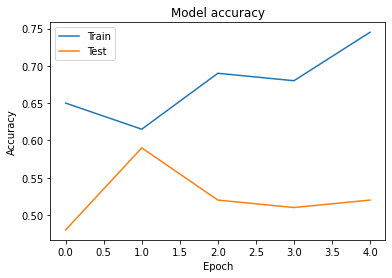

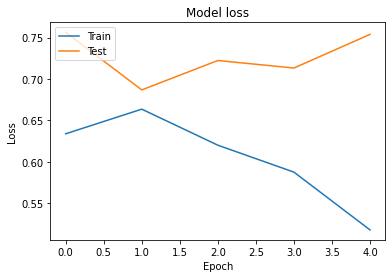

In [11]:
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt

epochs = 5
train_samples = 200
validation_samples = 100
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/CNN_Image/cnnBest_epoch10.hdf5', 
                               verbose=0,
                               save_best_only=True)

history = model.fit_generator(train_generator,
                    steps_per_epoch = train_samples / batch_size,
                    epochs = epochs, callbacks = [checkpointer],
                    validation_data = validation_generator,
                    validation_steps = validation_samples / batch_size,
                    verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


After the neural network reaches ~70% accuracy. We can witness overfitting, no progress is made over validation set in the next epochs

# Loading the Best Model and Evaluate with Evaluation Split

In [13]:
model.load_weights('/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/CNN_Image/cnnBest_epoch10.hdf5')
print ("Loss, Accuracy")
model.evaluate_generator(validation_generator, validation_samples)

Loss, Accuracy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.6868799328804016, 0.5899999737739563]

# Data Augmentation for Improving the Model
By applying random transformation to our train set, we artificially enhance our dataset with new unseen images.
This will hopefully reduce overfitting and allows better generalization capability for our network.<br>
Example of data augmentation applied to a picture: 

<center> <img width="600" height="300" src="https://drive.google.com/uc?id=1sCQamacNMwFfw_1mC0ariKTgiq33SAz6"> </<center>



In [14]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 200 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/5
6/6 [==============================] - 3s 465ms/step - loss: 0.6498 - accuracy: 0.6400 - val_loss: 0.7012 - val_accuracy: 0.5200
Epoch 2/5
6/6 [==============================] - 3s 428ms/step - loss: 0.7862 - accuracy: 0.6200 - val_loss: 0.6928 - val_accuracy: 0.5400
Epoch 3/5
6/6 [==============================] - 3s 429ms/step - loss: 0.6290 - accuracy: 0.6400 - val_loss: 0.6814 - val_accuracy: 0.5300
Epoch 4/5
6/6 [==============================] - 3s 429ms/step - loss: 0.6311 - accuracy: 0.6400 - val_loss: 0.6666 - val_accuracy: 0.6700
Epoch 5/5
6/6 [==============================] - 3s 413ms/step - loss: 0.6005 - accuracy: 0.7250 - val_loss: 0.6704 - val_accuracy: 0.6000


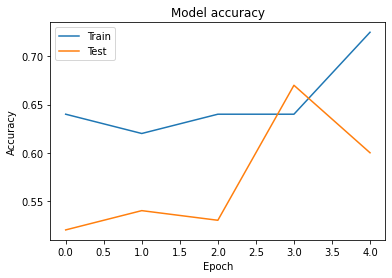

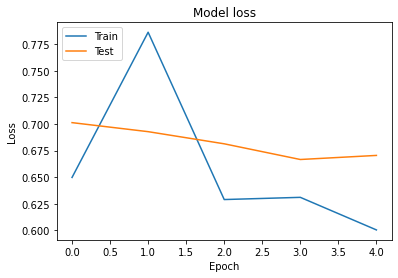

In [15]:
epochs = 5
train_samples = 200
validation_samples = 100
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/CNN_Image/cnnBestAugmented_epoch10.hdf5', 
                               verbose=0,
                               save_best_only=True)

history = model.fit_generator(train_generator_augmented,
                    steps_per_epoch = train_samples / batch_size,
                    epochs = epochs, callbacks = [checkpointer],
                    validation_data = validation_generator,
                    validation_steps = validation_samples / batch_size,
                    verbose = 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
model.load_weights('/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/CNN_Image/cnnBestAugmented_epoch10.hdf5')
print ("Loss, Accuracy")
model.evaluate_generator(validation_generator, validation_samples)

Loss, Accuracy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7059800624847412, 0.6100000143051147]

**Thanks to data-augmentation, the accuracy on the validation set improved to ~61%**

---



<center> <img width="600" height="300" src="https://drive.google.com/uc?id=1LdciBzE4Oc__NE00Bw0TisofYTP0qGc0"> </<center>


